In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv("formatted_data.csv")


In [89]:
df[['cena','czynsz','rozmiar','liczbaPokoi','rokBudowy','odległośćOdMetra']].describe().loc[['mean','std','min','25%','50%','75%','max']].transpose().apply(lambda s: s.apply('{0:.2f}'.format))

,mean,std,min,25%,50%,75%,max
cena,1247206.58,1601621.39,149000.00,729000.00,920000.00,1330000.00,100000000.00
czynsz,958.99,671.91,1.00,612.00,826.00,1090.75,22977.00
rozmiar,64.93,37.10,11.28,43.30,56.00,74.00,487.75
liczbaPokoi,2.71,1.06,1.00,2.00,3.00,3.00,11.00
rokBudowy,1785.51,614.25,0.00,1964.00,2004.00,2020.00,2026.00
odległośćOdMetra,2.23,2.15,0.02,0.60,1.52,3.38,14.43


In [90]:
df.to_csv("data_for_model_2.csv",index=False)

In [91]:
IQR_SIZE = 74 - 43
size_outliers_upper = 74 + 1.5*IQR_SIZE
size_outliers_lower = 43.3 - 1.5*IQR_SIZE
IQR_PRICE = 1330000 - 729000
price_outliers_upper = 1330000 + 1.5*IQR_PRICE
price_outliers_lower = 729000 - 1.5*IQR_PRICE

IQR_RENT = 1090 - 612
rent_outliers_upper = 1090 + 1.5*IQR_RENT
rent_outliers_lower = 612 - 1.5*IQR_RENT

In [92]:


df = df[(df['rozmiar'].between(size_outliers_lower,size_outliers_upper)) & (df['czynsz'].between(rent_outliers_lower,rent_outliers_upper)) & (df['cena'].between(price_outliers_lower,price_outliers_upper)) ]
df.to_csv("data_wo_outliers_for_model_2.csv",index=False)

In [93]:
def checkIfLastFloor(row):
    if row['piętro'] == row['wysokośćBudynku']:
        row['czyPoddasze'] = 1
        return row
    row['czyPoddasze'] = 0
    return row
def createStopieńZabezpieczenia(row):
    ['domofon','antywłamaniowe','monitoring/ochrona','systemAlarmowy','roletyAntywłamaniowe','terenZamknęty']
    stopieńZabezpieczenia = row['domofon']+row['antywłamaniowe']+row['monitoring/ochrona']
    +row['systemAlarmowy']+row['roletyAntywłamaniowe']+row['terenZamknęty']
    row['stopieńZabezpieczenia'] = stopieńZabezpieczenia
    return row
def createCzyWyposazone(row):
    []
    wyposazenie = row['klimatyzacja']+row['kuchenka']+row['lodówka']
    +row['meble']+row['piekarnik']+row['pralka'] +row['telefon']+row['telewizjaKablowa']+row['telewizor']
    row['stopieńWyposażenia'] = wyposazenie
    return row
def createŚredniRozmiarPokoju(row):
    średniRozmiarPokoju = row['rozmiar']/row['liczbaPokoi']
    row['średniRozmiarPokoju'] = średniRozmiarPokoju
    return row
df = df.apply(checkIfLastFloor,axis=1)
df = df.apply(createStopieńZabezpieczenia,axis=1)
df = df.apply(createCzyWyposazone,axis=1)
df = df.apply(createŚredniRozmiarPokoju,axis=1)

In [94]:
df.head()

,cena,czynsz,rozmiar,liczbaPokoi,stan,materiał,typBudynku,okna,rokBudowy,piętro,...,zdalnaObsługa,ulica,MSI,dzielnica,miasto,odległośćOdMetra,czyPoddasze,stopieńZabezpieczenia,stopieńWyposażenia,średniRozmiarPokoju
0,597000,700,36.2,2,do remontu,wielka płyta,blok,nieznane,1980,2,...,nieznane,Ursynów Północny,0,Ursynów,Warszawa,0.372533,0,0,0,18.100000
1,650000,1300,64.5,3,do zamieszkania,pustak,blok,plastikowe,2001,3,...,nieznane,ul. Ćmielowska 15,Tarchomin,Białołęka,Warszawa,3.792713,1,0,2,21.500000
2,919999,900,64.0,3,do zamieszkania,nieznane,blok,plastikowe,1989,3,...,nieznane,ul. Deotymy,Koło,Wola,Warszawa,0.505706,0,3,1,21.333333
3,1970000,1056,66.0,4,nieznane,nieznane,kamienica,nieznane,1938,7,...,nieznane,Śródmieście Północne,0,Śródmieście,Warszawa,0.669959,0,0,1,16.500000
4,1850000,1120,70.0,3,nieznane,nieznane,kamienica,plastikowe,1938,6,...,nieznane,Śródmieście Północne,0,Śródmieście,Warszawa,0.057114,1,0,1,23.333333


In [95]:
df[df['czynsz']==22977]

,cena,czynsz,rozmiar,liczbaPokoi,stan,materiał,typBudynku,okna,rokBudowy,piętro,...,zdalnaObsługa,ulica,MSI,dzielnica,miasto,odległośćOdMetra,czyPoddasze,stopieńZabezpieczenia,stopieńWyposażenia,średniRozmiarPokoju


In [96]:
# Tabela lat:
latitudes = [
    52.131944, 52.140833, 52.149167, 52.156111, 52.161944, 52.172778,
    52.181389, 52.189722, 52.198611, 52.208611, 52.218333, 52.231389,
    52.235833, 52.244722, 52.257778, 52.269167, 52.271667, 52.276389,
    52.281944, 52.286389, 52.2911, 52.238611, 52.240278, 52.2391,
    52.2377, 52.23164, 52.230139, 52.233056, 52.235833, 52.237083,
    52.24, 52.245833, 52.254722, 52.2634, 52.2695, 52.2753, 52.28369,
    52.292111, 52.1736, 52.225278, 52.25
]

# Tabela lon:
longitudes = [
    21.065, 21.056389, 21.046389, 21.034722, 21.027778, 21.026389,
    21.023056, 21.016667, 21.012222, 21.007778, 21.015278, 21.010556,
    21.0075, 21.000556, 20.994444, 20.984167, 20.971667, 20.961389,
    20.949444, 20.939444, 20.9289, 20.910278, 20.93, 20.9442,
    20.9599, 20.967039, 20.983333, 20.998333, 21.0075, 21.017917,
    21.031667, 21.043333, 21.034722, 21.0453, 21.0514, 21.0554,
    21.0622, 21.047361, 21.0146, 21.014167, 20.998889
]

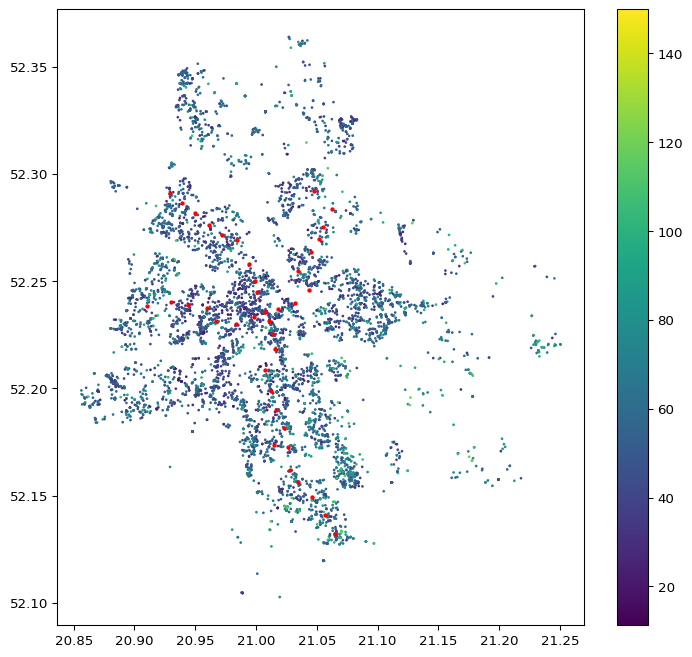

In [97]:
cmap = sns.color_palette("viridis", as_cmap=True)
f,ax = plt.subplots(figsize=(850/96,800/96),dpi=96)
# plt.figure(figsize=(24,8),dpi=100)
point = ax.scatter(y = df['długośćGeograficzna'], x = df['szerokośćGeograficzna'], c=df['rozmiar'],cmap=cmap,s=1,vmax=150)
ax.scatter(y=latitudes,x=longitudes,color='red',s=5)
f.colorbar(point)
plt.savefig('size-map.png', transparent=True)

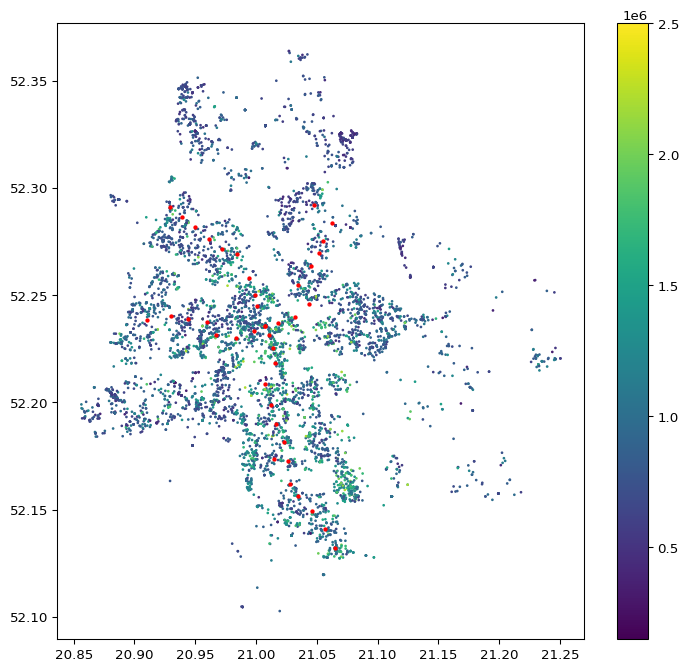

In [98]:
cmap = sns.color_palette("viridis", as_cmap=True)
f,ax = plt.subplots(figsize=(850/96,800/96),dpi=96)
# plt.figure(figsize=(24,8),dpi=100)
point = ax.scatter(y = df['długośćGeograficzna'], x = df['szerokośćGeograficzna'], c=df['cena'],cmap=cmap,s=1,vmax=2500000)
ax.scatter(y=latitudes,x=longitudes,color='red',s=5)
f.colorbar(point)
plt.savefig('price-map.png', transparent=True)

In [99]:
df[df['rokBudowy']>0].describe()

,cena,czynsz,rozmiar,liczbaPokoi,rokBudowy,piętro,wysokośćBudynku,czyDwupoziomowe,oddzielnaKuchnia,winda,...,roletyAntywłamaniowe,terenZamknęty,długośćGeograficzna,szerokośćGeograficzna,miejsceParkingowe,odległośćOdMetra,czyPoddasze,stopieńZabezpieczenia,stopieńWyposażenia,średniRozmiarPokoju
count,5.859000e+03,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,...,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000
mean,9.739021e+05,810.867725,55.588557,2.522444,1996.377197,2.872845,5.788189,0.018433,0.188087,0.667179,...,0.014166,0.286738,52.231054,21.007382,0.558969,2.330449,0.172555,1.363202,0.720259,22.812076
std,3.678230e+05,296.167179,19.009711,0.877607,28.807375,2.558308,3.922259,0.134523,0.390815,0.471263,...,0.118186,0.452277,0.050501,0.068901,0.496553,2.154546,0.377894,1.083813,0.998164,5.548681
min,2.390000e+05,1.000000,11.280000,1.000000,1830.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,52.102680,20.856345,0.000000,0.017116,0.000000,0.000000,0.000000,10.360000
25%,7.090000e+05,600.000000,41.690000,2.000000,1974.000000,1.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,52.196502,20.954220,0.000000,0.665231,0.000000,0.000000,0.000000,18.936667
50%,8.790000e+05,790.000000,53.300000,2.000000,2008.000000,2.000000,5.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,52.230850,21.008170,1.000000,1.682480,0.000000,1.000000,0.000000,22.000000
75%,1.169000e+06,992.000000,66.510000,3.000000,2022.000000,4.000000,7.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,52.259003,21.055055,1.000000,3.682357,0.000000,2.000000,2.000000,25.575000
max,2.218942e+06,1800.000000,120.000000,7.000000,2026.000000,10.000000,31.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,52.363830,21.250410,1.000000,14.425713,1.000000,3.000000,3.000000,75.060000


In [100]:
df[['cena','czynsz','rozmiar','liczbaPokoi','rokBudowy','odległośćOdMetra']].describe().loc[['mean','std','min','25%','50%','75%','max']].transpose().apply(lambda s: s.apply('{0:.2f}'.format))

,mean,std,min,25%,50%,75%,max
cena,967672.21,368533.25,149000.00,700000.00,870000.00,1151308.50,2218942.00
czynsz,812.61,296.05,1.00,600.00,795.00,990.00,1800.00
rozmiar,55.37,18.98,11.28,41.49,53.09,66.15,120.00
liczbaPokoi,2.52,0.88,1.00,2.00,2.00,3.00,7.00
rokBudowy,1781.96,618.78,0.00,1964.00,2003.00,2020.00,2026.00
odległośćOdMetra,2.31,2.15,0.02,0.66,1.67,3.64,14.43


<Axes: xlabel='odległośćOdMetra', ylabel='cena'>

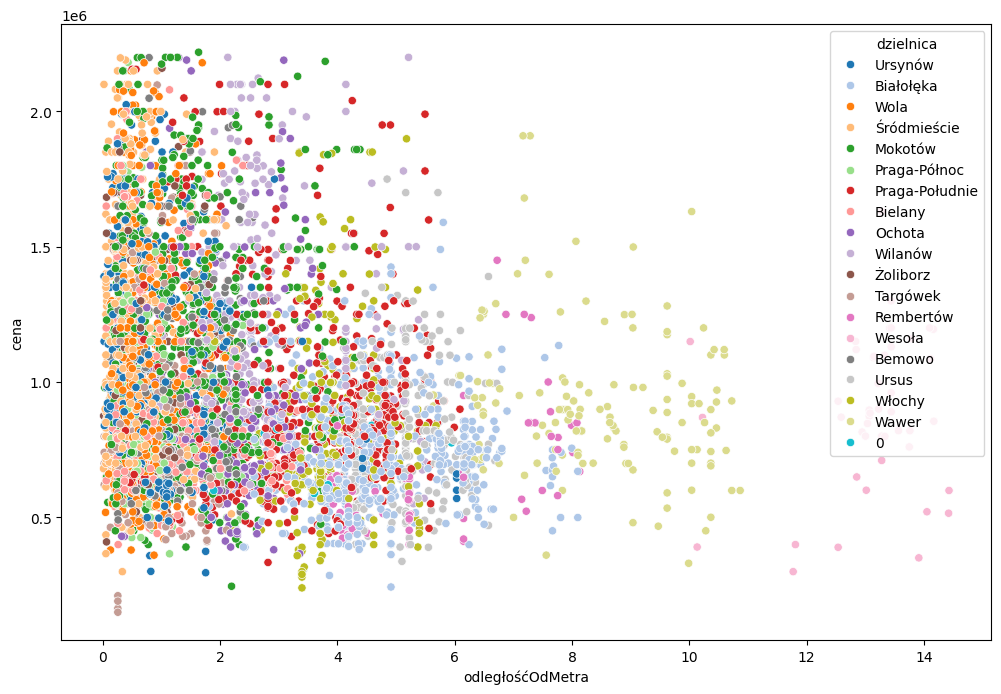

In [101]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='odległośćOdMetra',y='cena',hue='dzielnica',palette='tab20')

In [102]:
df.columns

Index(['cena', 'czynsz', 'rozmiar', 'liczbaPokoi', 'stan', 'materiał',
       'typBudynku', 'okna', 'rokBudowy', 'piętro', 'wysokośćBudynku',
       'czyDwupoziomowe', 'oddzielnaKuchnia', 'winda', 'piwnica',
       'pomieszczenieUżytkowe', 'balkon', 'ogródek', 'taras', 'internet',
       'klimatyzacja', 'kuchenka', 'lodówka', 'meble', 'piekarnik', 'pralka',
       'telefon', 'telewizjaKablowa', 'telewizor', 'zmywarka', 'domofon',
       'antywłamaniowe', 'monitoring/ochrona', 'systemAlarmowy',
       'roletyAntywłamaniowe', 'terenZamknęty', 'rynek', 'typWłasności',
       'ogrzewanie', 'długośćGeograficzna', 'szerokośćGeograficzna',
       'miejsceParkingowe', 'zdalnaObsługa', 'ulica', 'MSI', 'dzielnica',
       'miasto', 'odległośćOdMetra', 'czyPoddasze', 'stopieńZabezpieczenia',
       'stopieńWyposażenia', 'średniRozmiarPokoju'],
      dtype='object')

<Axes: xlabel='typBudynku', ylabel='rokBudowy'>

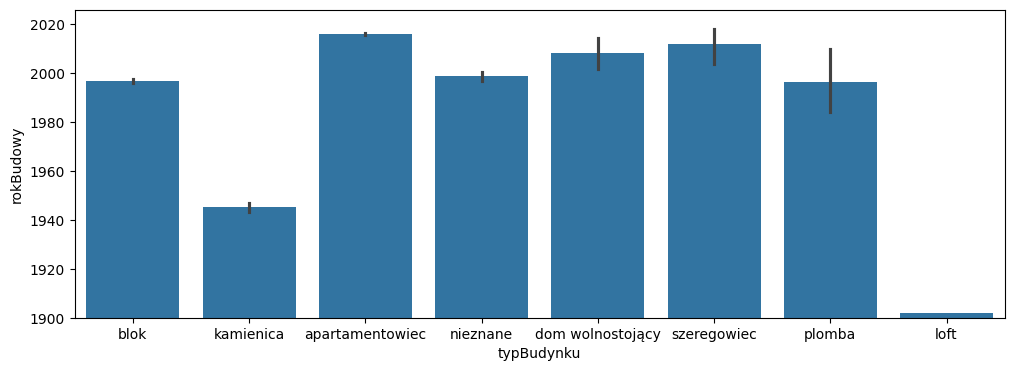

In [103]:
plt.figure(figsize=(12,4))
plt.ylim(1900, 2026)
sns.barplot(data=df[df['rokBudowy']>1],x='typBudynku',y='rokBudowy')

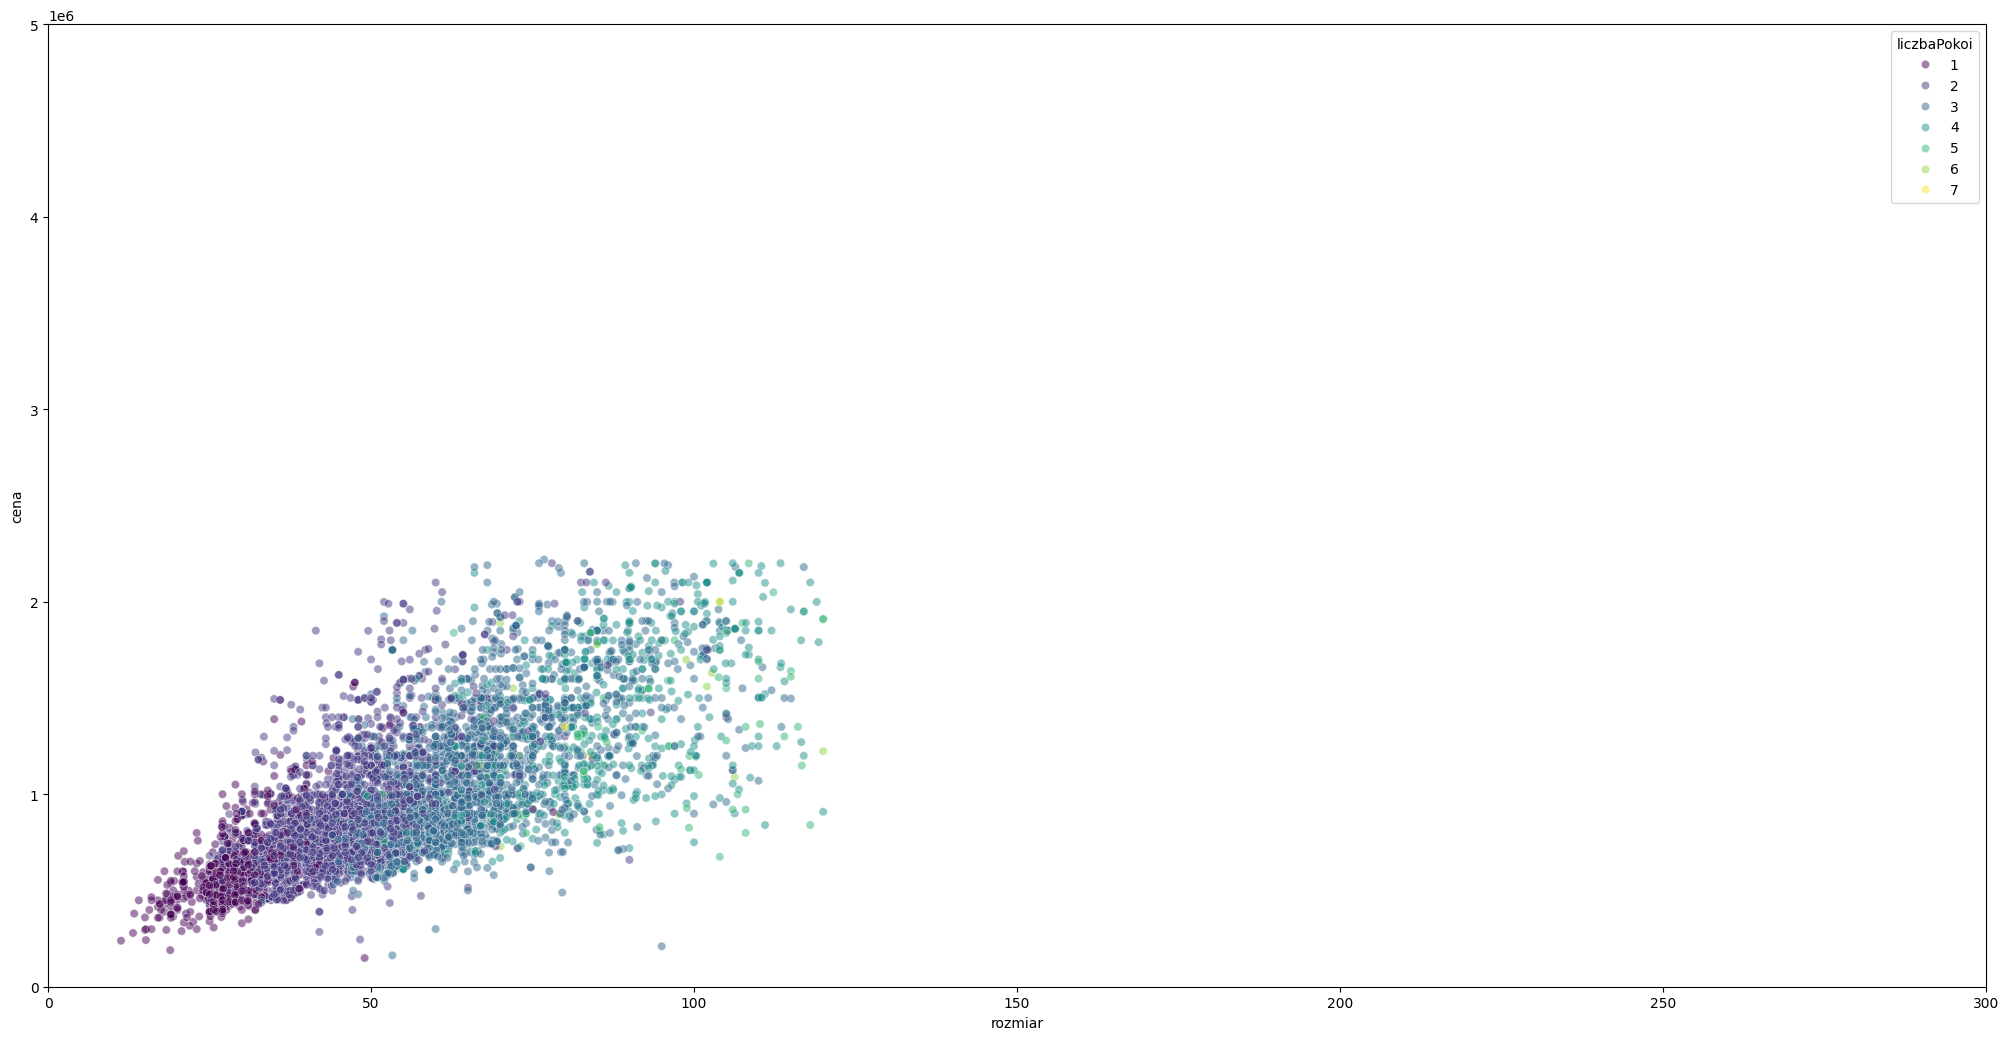

In [104]:
plt.figure(figsize=(2400/96,1200/96))
plt.ylim(0,5000000)
plt.xlim(0,300)
sns.scatterplot(data=df,x='rozmiar',y='cena',hue='liczbaPokoi',alpha=0.5,palette='viridis')
plt.savefig('price-size.png', dpi=96)

In [105]:
dummies_df = pd.get_dummies(df.drop('ulica',axis=1))
# dummies_df.corr()['cena']

In [106]:
dummies_df.corr()['cena'][np.abs(dummies_df.corr()['cena'])>0.1].sort_values()[1:-1]

typBudynku_blok              -0.263554
dzielnica_Białołęka          -0.226213
odległośćOdMetra             -0.203573
okna_plastikowe              -0.157176
MSI_Grodzisk                 -0.147282
materiał_wielka płyta        -0.147010
rynek_pierwotny              -0.123131
piwnica                      -0.112951
stan_do remontu              -0.104647
terenZamknęty                 0.101009
stopieńWyposażenia            0.103440
monitoring/ochrona            0.103993
telewizor                     0.109918
typBudynku_kamienica          0.118879
rynek_wtórny                  0.123131
stan_do zamieszkania          0.128155
taras                         0.136128
MSI_Błonia Wilanowskie        0.141071
miejsceParkingowe             0.143117
dzielnica_Mokotów             0.148057
dzielnica_Wilanów             0.150754
klimatyzacja                  0.153756
zmywarka                      0.155177
dzielnica_Śródmieście         0.171485
okna_drewniane                0.207968
średniRozmiarPokoju      

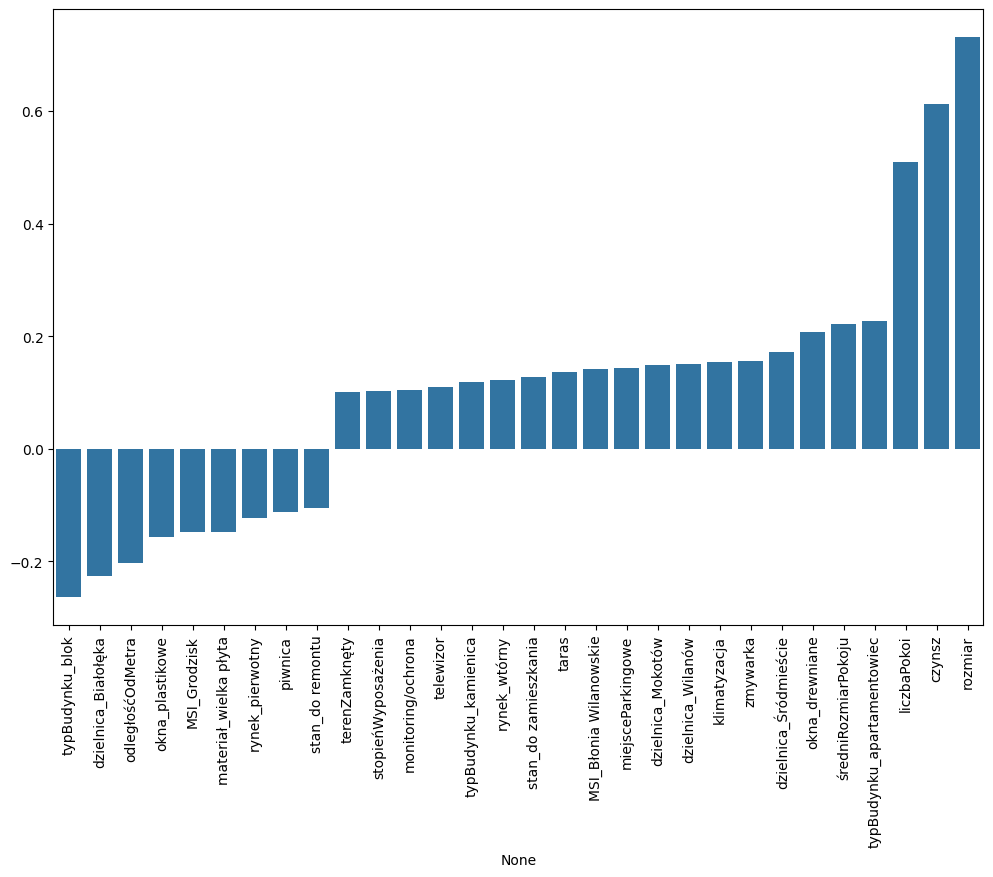

In [107]:
corr_feat = dummies_df.corr()['cena'][np.abs(dummies_df.corr()['cena'])>0.1].sort_values()[1:-1]
plt.figure(figsize=(12,8))
sns.barplot(x=corr_feat.index,y=corr_feat.values)
plt.xticks(rotation=90);
plt.savefig('price-column-corr.png', dpi=96)

In [108]:
df.columns

Index(['cena', 'czynsz', 'rozmiar', 'liczbaPokoi', 'stan', 'materiał',
       'typBudynku', 'okna', 'rokBudowy', 'piętro', 'wysokośćBudynku',
       'czyDwupoziomowe', 'oddzielnaKuchnia', 'winda', 'piwnica',
       'pomieszczenieUżytkowe', 'balkon', 'ogródek', 'taras', 'internet',
       'klimatyzacja', 'kuchenka', 'lodówka', 'meble', 'piekarnik', 'pralka',
       'telefon', 'telewizjaKablowa', 'telewizor', 'zmywarka', 'domofon',
       'antywłamaniowe', 'monitoring/ochrona', 'systemAlarmowy',
       'roletyAntywłamaniowe', 'terenZamknęty', 'rynek', 'typWłasności',
       'ogrzewanie', 'długośćGeograficzna', 'szerokośćGeograficzna',
       'miejsceParkingowe', 'zdalnaObsługa', 'ulica', 'MSI', 'dzielnica',
       'miasto', 'odległośćOdMetra', 'czyPoddasze', 'stopieńZabezpieczenia',
       'stopieńWyposażenia', 'średniRozmiarPokoju'],
      dtype='object')

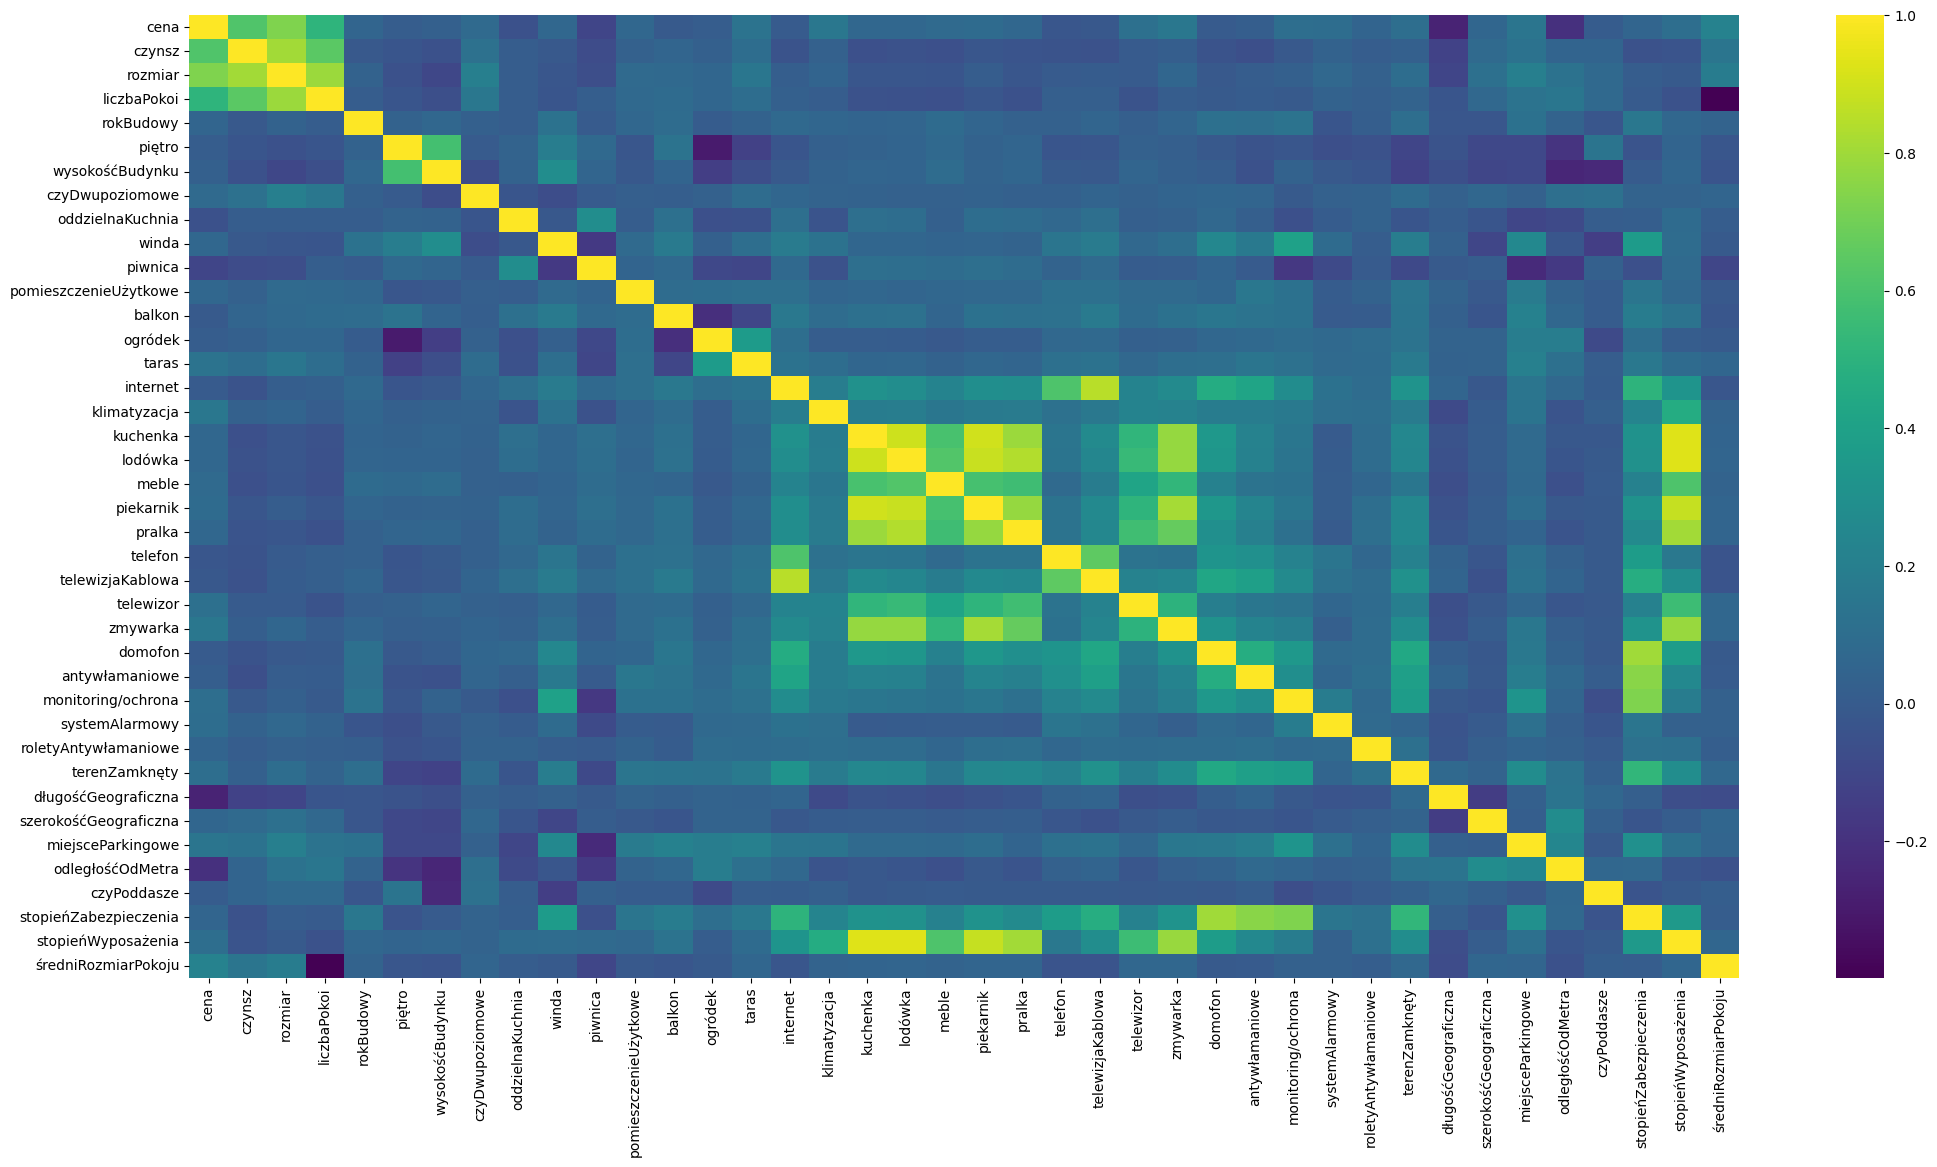

In [109]:
df_corr = pd.get_dummies(df.drop(['ulica','MSI','miasto','typBudynku','materiał','stan','dzielnica','typWłasności','okna','zdalnaObsługa','ogrzewanie','rynek'],axis=1))
plt.figure(figsize=(2400/96,1200/96))
sns.heatmap(df_corr.corr(),cmap='viridis')
plt.savefig('price-corr.png', dpi=96)

<Axes: xlabel='liczbaPokoi', ylabel='rozmiar'>

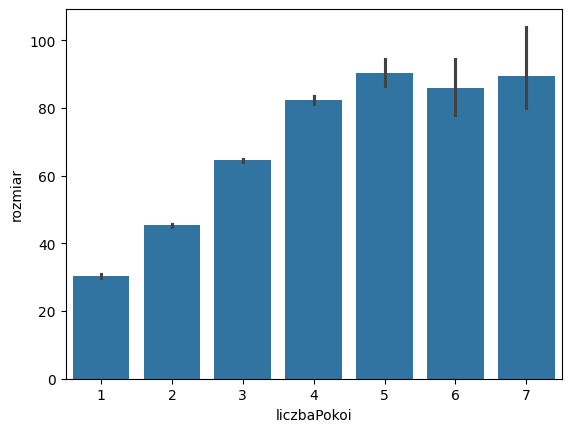

In [110]:
sns.barplot(data=df,x='liczbaPokoi',y='rozmiar')

<Figure size 2500x1250 with 0 Axes>

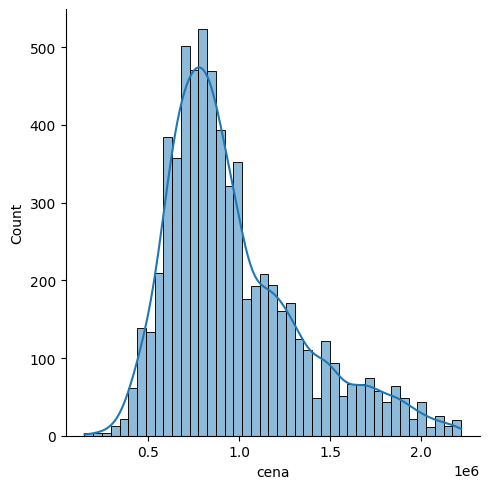

In [111]:
plt.figure(figsize=(2400/96,1200/96),facecolor='white')
sns.displot(data=df[df['cena']<3000000],x='cena',kde=True)
plt.savefig('price-kde.png', dpi=96)

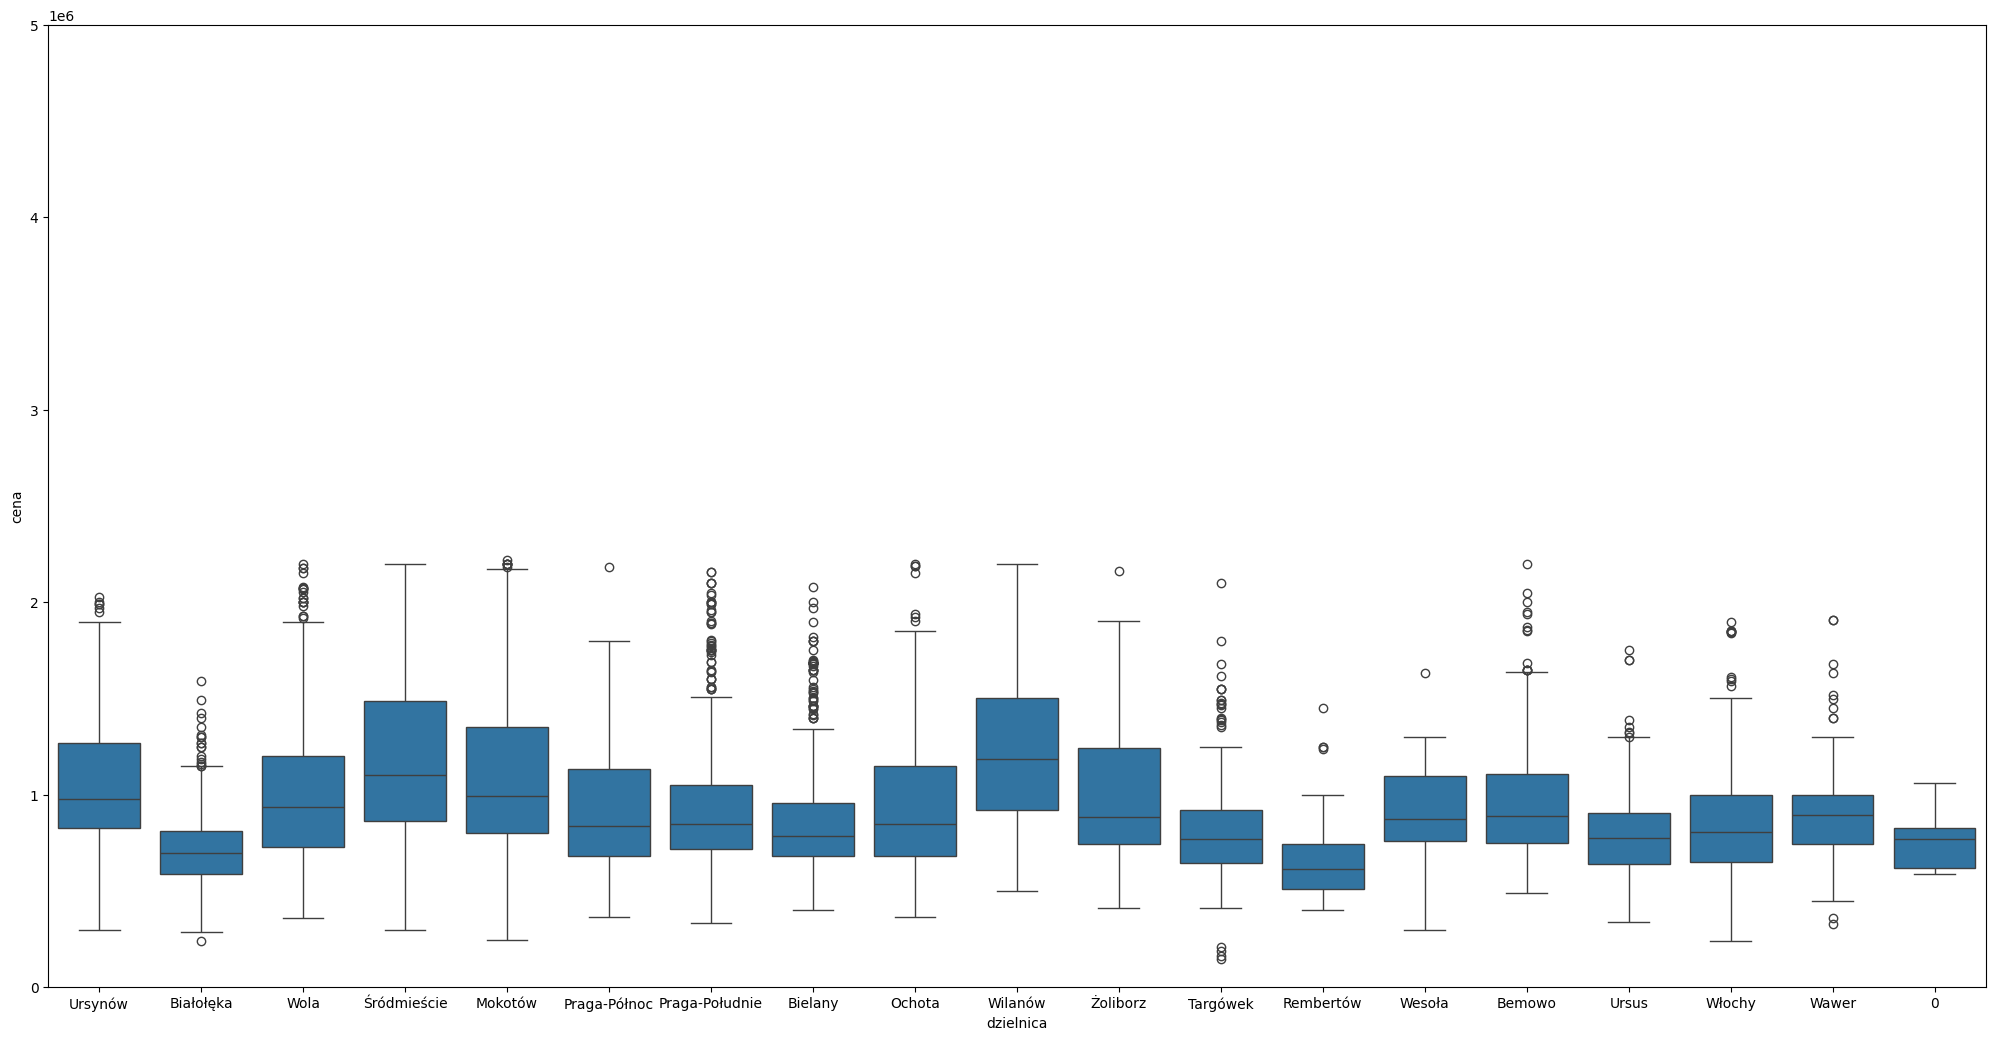

In [112]:
plt.figure(figsize=(2400/96,1200/96),facecolor='white')
plt.ylim(0,5000000)
sns.boxplot(data=df,x='dzielnica',y='cena')
plt.savefig('price-district.png', dpi=96)

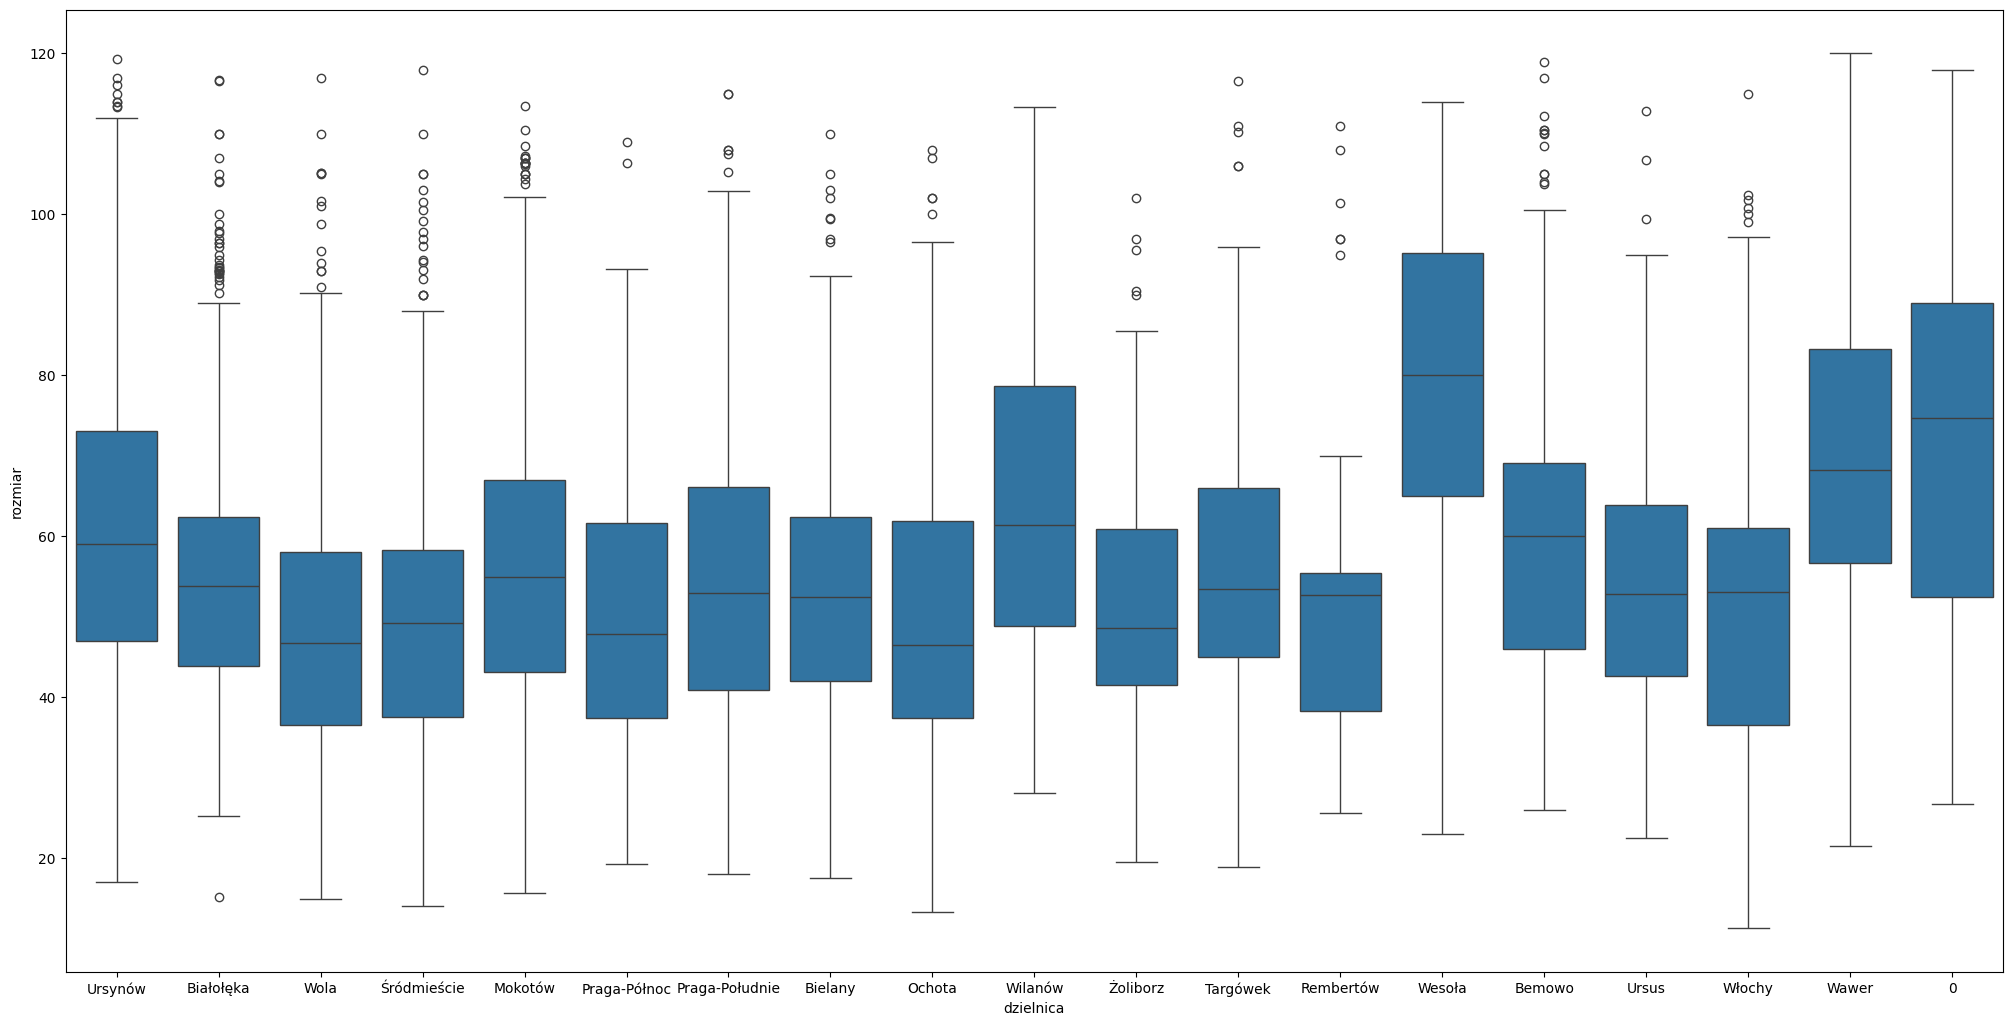

In [113]:
plt.figure(figsize=(2400/96,1200/96),facecolor='white')
sns.boxplot(data=df,x='dzielnica',y='rozmiar')
plt.savefig('size-district.png', dpi=96)